# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Kadek Wahyu Medalika Manik Segara]
- **Email:** [kadek.wahyu0303@mail.ugm.ac.id]
- **ID Dicoding:** [wahyu_medalika]

## Menentukan Pertanyaan Bisnis

- *Supply and Demand* merupakan suatu prinsip yang harus diperhatikan dalam berbisnis. Mampu menganalisis produk yang paling diminati oleh konsumen dapat membuat penjual mengoptimalkan strategi penjualan, baik dengan penyediaan inventaris maupun menaikkan harga produk untuk memaksimalkan keuntungan. Apa Top 10 produk terlaris di toko?
- Untuk meningkatkan pelayanan terhadap konsumen, memberikan kenyamanan dalam aktivitas belanja sangatlah penting. Salah satunya ialah dengan mengetahui metode pembayaran yang paling digemari oleh konsumen. Dengan memahami ini, penjual diharapkan mampu memberikan pelayanan terbaik kepada konsumen. Metode pembayaran apa yang paling sering digunakan oleh customer?
- Memperhatikan rentang waktu pengiriman dengan sampainya produk ke customer juga merupakan aspek yang diperhatikan dalam berbelanja. Maka, penting untuk mengetahui rata-rata rentang waktu pengiriman dengan sampainya produk agar dapat dioptimalkan lebih lanjut. Berapa lama rata-rata waktu pengiriman dengan sampainya produk ke customer?

## Import Semua Packages/Library yang Digunakan

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat dataset yang diperlukan

In [57]:
item_df = pd.read_csv("/content/order_items_dataset.csv")
payment_df = pd.read_csv("/content/order_payments_dataset.csv")
order_df = pd.read_csv("/content/orders_dataset.csv")

Mengecek tiap dataset

In [58]:
item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [59]:
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [60]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

Meninjau apakah terdapat missing value data, data duplikasi, datau data outlier

In [61]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [62]:
item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [63]:
print("Jumlah duplikasi: ", item_df.duplicated().sum())

Jumlah duplikasi:  0


In [64]:
item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [65]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [66]:
payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [67]:
print("Jumlah duplikasi: ", payment_df.duplicated().sum())

Jumlah duplikasi:  0


In [68]:
payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [69]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [70]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [71]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Cleaning Data hanya dilakukan pada dataset order_df dikarenakan dataset item_df dan payment_df sudah bersih (tidak terdapat missing value, data duplikat, dan outlier). Pada dataset order_df terdapat missing value dan juga tipe data yang tidak sesuai.

In [72]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [73]:
order_df.dropna(subset=['order_delivered_customer_date'], inplace=True)

In [74]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96476 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96462 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


## Exploratory Data Analysis (EDA)

### Explore Data

In [75]:
item_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [76]:
items_df = item_df.groupby('product_id')['order_item_id'].agg('sum').reset_index()
items_df = items_df.sort_values(by='order_item_id', ascending=False).reset_index()
items_df

,index,product_id,order_item_id
0,8613,422879e10f46682990de24d770e7f83d,793
1,22112,aca2eb7d00ea1a7b8ebd4e68314663af,640
2,7079,368c6c730842d78016ad823897a372db,551
3,10840,53759a2ecddad2bb87a079a1f1519f73,545
4,19742,99a4788cb24856965c36a24e339b6058,542
...,...,...,...
32946,14305,6ec96c91757fad0aecafc0ee7f262dcc,1
32947,14303,6ec26b3516fecd18cda3001a9c48a242,1
32948,14301,6ec18f98bd4eb7efc0989af1505a3f86,1
32949,14299,6ebdbcab1f0dc7e1d3ecb01c1b140ade,1


In [77]:
payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [78]:
top_payment_type = payment_df["payment_type"].value_counts()
top_payment_type

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [79]:
order_df.describe(include="all", datetime_is_numeric=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96476,96476,96476,96476,96462,96475,96476,96476
unique,96476,96476,2,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96470,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 22:44:47.156474368,2018-01-02 10:08:41.350552576,2018-01-05 04:14:08.754413056,2018-01-14 12:09:19.035542784,2018-01-25 16:27:14.993158656
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 08:10:58,2017-09-14 14:30:16,2017-09-18 16:21:06,2017-09-25 22:07:22.249999872,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 19:21:46,2018-01-22 13:48:57,2018-01-24 15:55:11,2018-02-02 19:28:10.500000,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 18:28:21.750000128,2018-05-06 10:30:44.750000128,2018-05-08 14:32:00,2018-05-15 22:48:52.249999872,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [80]:
delivery_time = order_df["order_estimated_delivery_date"]-order_df["order_approved_at"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)

In [81]:
order_df.describe(include="all", datetime_is_numeric=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96476,96476,96476,96476,96462,96475,96476,96476,96462.000000
unique,96476,96476,2,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96470,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 22:44:47.156474368,2018-01-02 10:08:41.350552576,2018-01-05 04:14:08.754413056,2018-01-14 12:09:19.035542784,2018-01-25 16:27:14.993158656,23.254390
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-7.000000
25%,NaN,NaN,NaN,2017-09-14 08:10:58,2017-09-14 14:30:16,2017-09-18 16:21:06,2017-09-25 22:07:22.249999872,2017-10-05 00:00:00,18.000000
50%,NaN,NaN,NaN,2018-01-20 19:21:46,2018-01-22 13:48:57,2018-01-24 15:55:11,2018-02-02 19:28:10.500000,2018-02-16 00:00:00,23.000000
75%,NaN,NaN,NaN,2018-05-05 18:28:21.750000128,2018-05-06 10:30:44.750000128,2018-05-08 14:32:00,2018-05-15 22:48:52.249999872,2018-05-28 00:00:00,28.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,154.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-82-284df0e40be9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  histo_item_df.sort_values(by='order_item_id', inplace=True)


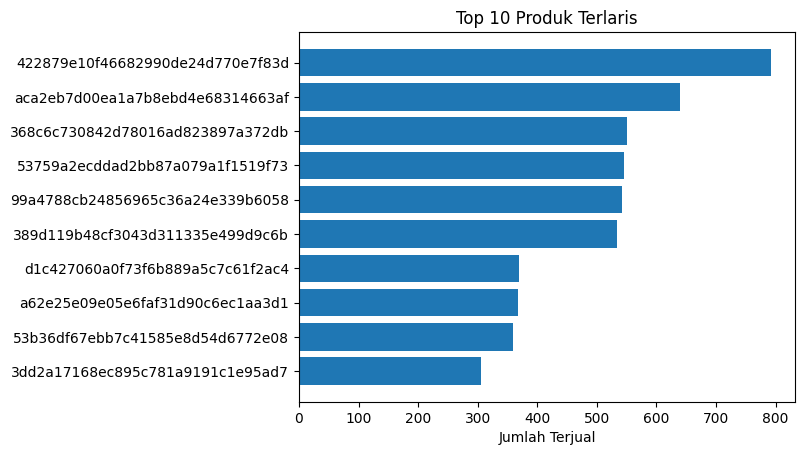

In [82]:
histo_item_df = items_df.head(10)
histo_item_df.sort_values(by='order_item_id', inplace=True)
plt.barh(y=histo_item_df["product_id"], width=histo_item_df["order_item_id"])
plt.xlabel("Jumlah Terjual")
plt.title("Top 10 Produk Terlaris")
plt.show()

### Pertanyaan 2:

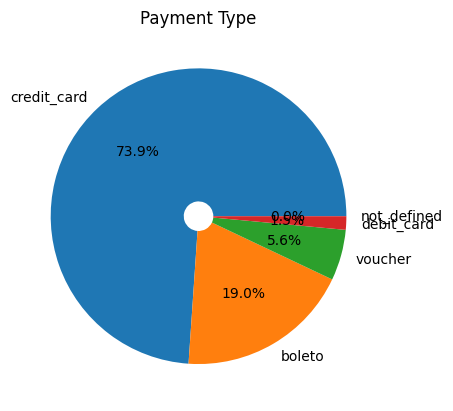

In [83]:
pie_df = pd.DataFrame({'Payment Type': top_payment_type.index, 'Count': top_payment_type.values})

plt.pie(
    x=pie_df["Count"],
    labels=pie_df["Payment Type"],
    autopct='%1.1f%%',
    wedgeprops = {'width': 0.9}
)
plt.title("Payment Type")
plt.show()

## Conclusion

- *Supply and Demand* merupakan suatu prinsip yang harus diperhatikan dalam berbisnis. Mampu menganalisis produk yang paling diminati oleh konsumen dapat membuat penjual mengoptimalkan strategi penjualan, baik dengan penyediaan inventaris maupun menaikkan harga produk untuk memaksimalkan keuntungan. Apa Top 10 produk terlaris di toko?
- Untuk meningkatkan pelayanan terhadap konsumen, memberikan kenyamanan dalam aktivitas belanja sangatlah penting. Salah satunya ialah dengan mengetahui metode pembayaran yang paling digemari oleh konsumen. Dengan memahami ini, penjual diharapkan mampu memberikan pelayanan terbaik kepada konsumen. Setelah dianalisis, metode pembayaran yang paling sering digunakan oleh customer adalah *credit card* dengan persentase sebesar 73,9%.
- Memperhatikan rentang waktu pengiriman dengan sampainya produk di customer juga merupakan aspek yang diperhatikan dalam berbelanja. Maka, penting untuk mengetahui rata-rata rentang waktu pengiriman dengan sampainya produk agar dapat dioptimalkan lebih lanjut. Setelah dianalisis rata-rata rentang waktu pengiriman dan sampainya produk di customer adalah selama 23 hari.